In [9]:
import numpy as np
import matplotlib.pyplot as plt
from astropy import table
from scipy.optimize import curve_fit

On importe les données

In [41]:
lamda_doublet, counts_doublet = np.loadtxt("Données/doublet_sodium.txt", unpack = True, skiprows = 17)

lamda_or_brute, counts_or_brute = np.loadtxt("Données/echantillon_or.txt", unpack = True, skiprows = 17)
lamda_or_calib, counts_or_calib = np.loadtxt("Données/sans_echantillon_or.txt", unpack = True, skiprows = 17)

lamda_GaSe_brute, counts_GaSe_brute = np.loadtxt("Données/echantillon_GaSe.txt", unpack = True, skiprows = 17)
lamda_GaSe_calib, counts_GaSe_calib = np.loadtxt("Données/sans_echantillon_GaSe.txt", unpack = True, skiprows = 17)

lamda_un_0, counts_un_0 = np.loadtxt("Données/un0.txt", unpack = True, skiprows = 17)

lamda_deux_0, counts_deux_0 = np.loadtxt("Données/deux0.txt", unpack = True, skiprows = 17)

lamda_trois_0, counts_trois_0 = np.loadtxt("Données/trois0.txt", unpack = True, skiprows = 17)

lamda_vitre_0, counts_vitre_0 = np.loadtxt("Données/vitre0.txt", unpack = True, skiprows = 17)


On fit le doublet de sodium pour déterminer la résolution du spectrographe

H = 3165.690117546604, A = 55778.20194856248, x0 = 588.4706966006324, sigma = 0.6845731444903931


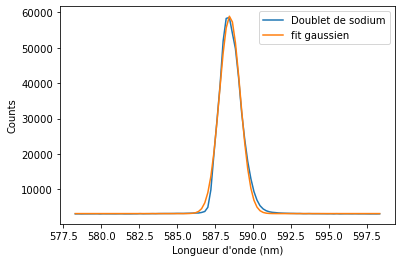

In [48]:
lamda_doublet_gauss, counts_doublet_gauss = lamda_doublet[1100:1200], counts_doublet[1100:1200] #On isole la gaussienne

#Faison un fit gaussien sur la courbe
def gauss(x, H, A, x0, sigma):
    return H + A * np.exp(-(x - x0) ** 2 / (2 * sigma ** 2))

p0 = [2000, 6e4, 587, 3] #Initial guess
p_opt, p_cov = curve_fit(gauss, lamda_doublet_gauss, counts_doublet_gauss, p0)
print("H = {}, A = {}, x0 = {}, sigma = {}".format(p_opt[0], p_opt[1], p_opt[2], p_opt[3]))

H, A, x0, sigma = p_opt[0], p_opt[1], p_opt[2], p_opt[3]

y_fit = gauss(lamda_doublet_gauss,H, A, x0, sigma)

plt.plot(lamda_doublet_gauss, counts_doublet_gauss, label = "Doublet de sodium")
plt.plot(lamda_doublet_gauss, y_fit, label = "fit gaussien")
plt.xlabel("Longueur d'onde (nm)")
plt.ylabel("Counts")
plt.legend()
plt.savefig("Graphiques/fit_gaussien.pdf")
plt.show()

Détermination de la résolution pour l'incertitude

In [47]:
fwhm = 2.35*sigma #Largeur à mi-hauteur de la gaussienne

res = x0/fwhm
print("Résolution du spectromètre: {}".format(res)) #Résolution du spectromètre

def erreur_lambda(lamda): 
    
    inc = lamda/res

    return inc



Résolution du spectromètre: 365.79445804824735


gap d'énergie/phonon

In [10]:
with open("Données/echantillon_GaSe.txt") as GaSe_brute:
    int_time_brute = float(list(GaSe_brute)[8].split(":")[1].split("(")[0])
    
with open("Données/sans_echantillon_GaSe.txt") as GaSe_calib:
    int_time_calib = float(list(GaSe_calib)[8].split(":")[1].split("(")[0])
    


3000.0